In [18]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
# import seaborn as sb
import nltk
nltk.download('punkt_tab')
from nltk import word_tokenize
import string
import datasets
from datasets import load_dataset
from collections import Counter, OrderedDict

[nltk_data] Downloading package punkt_tab to /home/margo/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [1]:
df = pd.read_parquet("hf://datasets/polygraf-ai/api-generated-25K-5llm-10model/data/train-00000-of-00001.parquet")
df

,Prompt,Tone,Source,Topic,text,llm,llm_group
0,Write a speech about pathophysiology of diseases,Text Generation,original,medical,Here's a draft speech on the pathophysiology o...,claude-3-sonnet-20240229,claude
1,Answer the prompt: What's the difference betwe...,Text Generation,DIBT/10k_prompts_ranked,lifestyle,The main difference between someone who really...,claude-3-opus-20240229,claude
2,Answer the prompt: You are given a singly link...,Text Generation,DIBT/10k_prompts_ranked,programming,Here's the Python implementation of the `appen...,claude-3-sonnet-20240229,claude
3,Answer the prompt: I wan't you to paraphrase s...,Text Generation,DIBT/10k_prompts_ranked,entertainment,Here is a professional paraphrasing of your th...,claude-3-haiku-20240307,claude
4,Answer the prompt: Creating Engaging E-Learnin...,Text Generation,DIBT/10k_prompts_ranked,educational,Here's a detailed lesson plan for creating eng...,claude-3-sonnet-20240229,claude
...,...,...,...,...,...,...,...
24988,"Here's an extract from a webpage:"" What does ...",Text Generation,cosmopedia/auto_math_text,educational,"Sure, let's imagine you're a grade-school stud...",mistral-large-latest,mistral
24989,"Answer the prompt: In a distant future, imagin...",Text Generation,DIBT/10k_prompts_ranked,journalism,"In the untamed jungles of Zealandia, Avwave, a...",mistral-large-latest,mistral
24990,Write a museum infographics about mobile app d...,Text Generation,original,programming,Title: The Evolution and Impact of Mobile App ...,mistral-large-latest,mistral
24991,Write an educational piece suited for college ...,Text Generation,cosmopedia/auto_math_text,educational,The Variation of Parameters is a powerful tech...,mistral-large-latest,mistral


In [2]:
df.llm.value_counts()

llm
llama3-70b-8192             5000
mistral-large-latest        4993
gemini-1.0-pro-latest       4015
claude-3-haiku-20240307     1707
claude-3-sonnet-20240229    1688
gpt-3.5-turbo-0125          1686
gpt-4-turbo-2024-04-09      1657
gpt-4                       1657
claude-3-opus-20240229      1605
gemini-1.5-pro-latest        985
Name: count, dtype: int64

In [3]:
#parallel texts
ds = load_dataset("artnitolog/llm-generated-texts")
parallel_texts = ds['train'].to_pandas()

README.md:   0%|          | 0.00/2.50k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/41.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [4]:
parallel_texts

,dataset_name,id,prompt,human,GPT4 Turbo 2024-04-09,GPT4 Omni,Claude 3 Opus,YandexGPT 3 Pro,GigaChat Pro,Llama3 70B,Command R+
0,essay,1,"Write an essay in 300 words to the prompt ""Ana...",The 2013 film 12 Years a Slave proved that sla...,"""12 Years a Slave,"" directed by Steve McQueen,...","""12 Years a Slave,"" directed by Steve McQueen,...","The film ""12 Years a Slave"" is a powerful expl...","The film ""12 Years a Slave"" depicts the horror...",The themes of collectivism and individualism p...,"The film 12 Years a Slave, directed by Steve M...","The film ""12 Years a Slave"" offers a harrowing..."
1,essay,2,"Write an essay in 300 words to the prompt ""Dis...",Social Media Examiner’s (2021) video on social...,Effective change leadership plays a pivotal ro...,Effective change leadership is crucial in adop...,"In today's fast-paced, digitally-driven busine...",**Effective Change Leadership in Adopting Soci...,Effective Change Leadership for Social Media I...,Effective change leadership plays a crucial ro...,The ever-changing landscape of digital marketi...
2,essay,3,"Write an essay in 400 words to the prompt ""Ana...",The world has been shattered by Russia’s attac...,**Analyzing the Headline: A Comparative Study ...,Title: Analyzing the Headline: A Comparative S...,The media plays a crucial role in shaping publ...,"К сожалению, я не могу ничего сказать об этом....",Как у нейросетевой языковой модели у меня не м...,The Ukraine-Russia conflict has been a pressin...,The ongoing Ukraine-Russia conflict has domina...
3,essay,4,"Write an essay in 600 words to the prompt ""Exp...",Charles Schwab is a for-profit Corporation who...,**Essay on the Business Form and Distinctive F...,Charles Schwab Corporation (CSC) represents a ...,Charles Schwab Corporation (CSC) is a prominen...,**Charles Schwab Corporation: A Financial Serv...,The Charles Schwab Corporation (CSC) is a lead...,The Charles Schwab Corporation (CSC) is a lead...,**Introduction:**\n\nThe Charles Schwab Corpor...
4,essay,5,"Write an essay in 300 words to the prompt ""Con...",The work of a clinical or medical office worke...,"In the discussion of career choices, a great d...",**Prompt: Preparing for Interviews and Profess...,"In the medical office assistant profession, pr...",### Essay Prompt: Cost Considerations and Prep...,Essay Prompt: In the medical office assistant ...,Here is a 300-word essay prompt:\n\nAs a medic...,"As aspiring medical office assistants, it is e..."
...,...,...,...,...,...,...,...,...,...,...,...
2995,wp,996,"Write a story in 600 words to the prompt ""You ...","NSFW LANGUAGE. Like. Lots of it.\n""Hey asshole...",Ella had always been the quiet shadow of Winte...,I had always been content with fading into the...,"As I stepped onto the stage, my heart raced wi...",**Graduation Day**\n\nI have been sitting in t...,Title: Breaking the Silence\n\nI never thought...,"I stood at the podium, my heart racing as I ga...","Sure, here is a story that follows your prompt..."
2996,wp,997,"Write a story in 200 words to the prompt ""Gang...","""Oh God, is it Gang Day again already?"" asked ...","I stepped into the dimly lit convention hall, ...","Under the glow of flickering streetlights, the...",As I walked into the bustling convention cente...,"К сожалению, я не могу ничего сказать об этом....","Не люблю менять тему разговора, но вот сейчас ...","I walked through the crowded gymnasium, surrou...",It was a sunny Saturday morning when I arrived...
2997,wp,998,"Write a story in 100 words to the prompt ""You ...","I held on, slowly falling, looking up at the t...",You hang to life by a literal thread—suspended...,"You hang to life by a literal thread, the voic...","Dangling from a frayed rope, you cling to the ...","I hang to life by a thread, one wrong move and...","In the depths of the Amazon jungle, a weary ex...","As I dangled over the abyss, my fate hung in t...","You hang by a thread, and all you can do is cl..."
2998,wp,999,"Write a story in 700 words to the

In [21]:
def create_wordrange(text):
    text_stripped = text.translate(text.maketrans('', '', string.punctuation))
    wordcount = Counter(word_tokenize(text_stripped)).most_common()
    counts = [count[1] for count in wordcount]
    return pd.Series([wordcount, counts])

In [56]:
def calc_zipf(counts, name):
    counts = counts.apply(lambda x: x[:100])
    rank_matrix = pd.DataFrame(counts.tolist())
    avg_freqs = human_rank_matrix.apply(np.mean).tolist()
    print(f'Average word frequencies: {avg_freqs[:10]}')
    freq_to_range_ratio = [freq / (i + 1) for i, freq in enumerate(avg_freqs)]
    norm_coef = sum(freq_to_range_ratio)
    normalized_distribution = pd.DataFrame([item / norm_coef for item in freq_to_range_ratio])
    normalized_distribution['source'] = name
    return normalized_distribution

In [22]:
parallel_texts[['human_wordcount', 'human_counts']] = parallel_texts.human.apply(create_wordrange)
parallel_texts.human_counts[:5]

0    [30, 24, 19, 15, 13, 13, 11, 10, 8, 8, 7, 6, 6...
1    [16, 15, 14, 5, 5, 5, 5, 4, 4, 3, 3, 3, 3, 3, ...
2    [23, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4,...
3    [21, 10, 10, 10, 9, 8, 8, 8, 7, 7, 6, 6, 5, 5,...
4    [14, 14, 13, 13, 11, 10, 8, 8, 6, 5, 5, 5, 5, ...
Name: human_counts, dtype: object

In [23]:
parallel_texts.human_wordcount[:5]

0    [(the, 30), (and, 24), (a, 19), (that, 15), (w...
1    [(to, 16), (and, 15), (the, 14), (social, 5), ...
2    [(the, 23), (in, 7), (and, 7), (of, 7), (The, ...
3    [(the, 21), (is, 10), (and, 10), (of, 10), (in...
4    [(a, 14), (the, 14), (and, 13), (I, 13), (of, ...
Name: human_wordcount, dtype: object

In [57]:
human_distr = calc_zipf(parallel_texts.human_counts, 'human')

Average word frequencies: [32.74433333333333, 21.870333333333335, 17.434, 14.856, 12.816333333333333, 11.332666666666666, 10.156333333333333, 9.200333333333333, 8.391666666666667, 7.709333333333333]


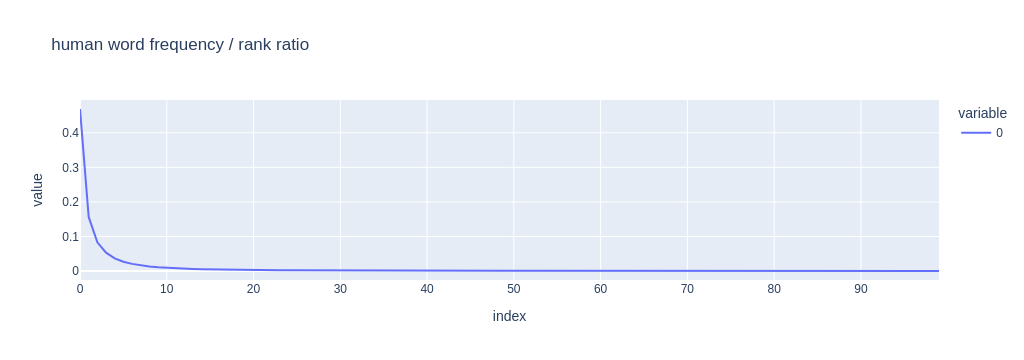

In [44]:
fig = px.line(human_distr, title='human word frequency / rank ratio')
fig.show()

In [45]:
parallel_texts[['gpt4o_wordcount', 'gpt4o_counts']] = parallel_texts['GPT4 Omni'].apply(create_wordrange)
parallel_texts.gpt4o_counts[:5]

0    [18, 15, 10, 9, 7, 6, 5, 4, 3, 3, 3, 3, 3, 3, ...
1    [14, 13, 12, 8, 8, 6, 6, 6, 5, 5, 5, 5, 4, 4, ...
2    [28, 20, 17, 11, 11, 9, 8, 8, 8, 7, 5, 5, 5, 4...
3    [33, 28, 22, 17, 12, 11, 9, 8, 8, 8, 7, 7, 7, ...
4    [20, 14, 11, 10, 8, 7, 6, 6, 5, 5, 5, 5, 5, 5,...
Name: gpt4o_counts, dtype: object

In [58]:
gpt4o_distr = calc_zipf(parallel_texts.gpt4o_counts, 'gpt4o')

Average word frequencies: [32.74433333333333, 21.870333333333335, 17.434, 14.856, 12.816333333333333, 11.332666666666666, 10.156333333333333, 9.200333333333333, 8.391666666666667, 7.709333333333333]


In [47]:
parallel_texts[['llama3_70b_wordcount', 'llama3_70b_counts']] = parallel_texts['Llama3 70B'].apply(create_wordrange)
parallel_texts.llama3_70b_counts[:5]

0    [23, 21, 20, 14, 9, 8, 7, 6, 5, 5, 5, 4, 3, 3,...
1    [18, 11, 10, 9, 9, 9, 9, 7, 6, 5, 5, 5, 4, 4, ...
2    [27, 22, 17, 13, 10, 9, 9, 8, 8, 7, 7, 7, 5, 5...
3    [31, 28, 27, 26, 22, 17, 14, 13, 12, 12, 12, 9...
4    [17, 12, 12, 11, 11, 10, 8, 6, 6, 5, 5, 4, 4, ...
Name: llama3_70b_counts, dtype: object

In [59]:
llama_distr = calc_zipf(parallel_texts.llama3_70b_counts, 'llama3_70b')

Average word frequencies: [32.74433333333333, 21.870333333333335, 17.434, 14.856, 12.816333333333333, 11.332666666666666, 10.156333333333333, 9.200333333333333, 8.391666666666667, 7.709333333333333]


In [49]:

parallel_texts[['claude3_wordcount', 'claude3_counts']] = parallel_texts['Claude 3 Opus'].apply(create_wordrange)
parallel_texts.claude3_counts[:5]

0    [26, 21, 16, 11, 10, 7, 6, 5, 5, 5, 5, 5, 4, 4...
1    [26, 15, 12, 12, 12, 8, 7, 6, 6, 6, 5, 5, 5, 5...
2    [41, 18, 13, 12, 11, 10, 9, 8, 8, 7, 7, 7, 7, ...
3    [27, 24, 18, 17, 14, 13, 12, 10, 10, 9, 9, 9, ...
4    [20, 15, 11, 9, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, ...
Name: claude3_counts, dtype: object

In [60]:
claude_distr = calc_zipf(parallel_texts.claude3_counts, 'claude3')

Average word frequencies: [32.74433333333333, 21.870333333333335, 17.434, 14.856, 12.816333333333333, 11.332666666666666, 10.156333333333333, 9.200333333333333, 8.391666666666667, 7.709333333333333]


In [61]:
all_distr = pd.concat([human_distr, gpt4o_distr, llama_distr, claude_distr])
all_distr.source.value_counts()

source
human         100
gpt4o         100
llama3_70b    100
claude3       100
Name: count, dtype: int64

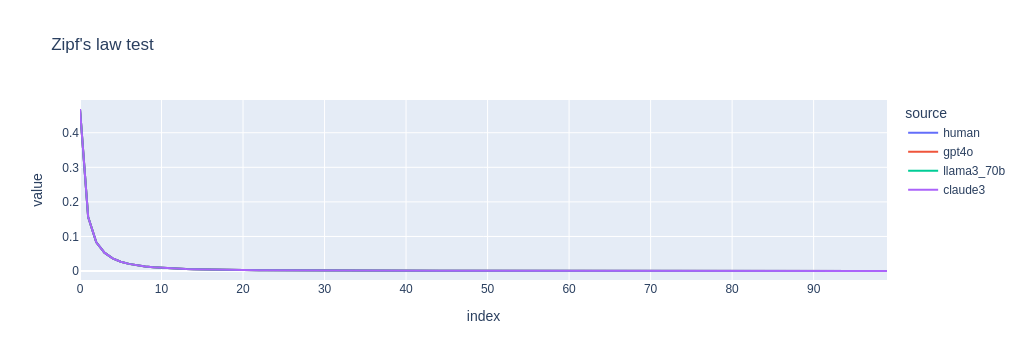

In [68]:
fig = px.line(all_distr, title="Zipf's law test", color = 'source')
fig.show()

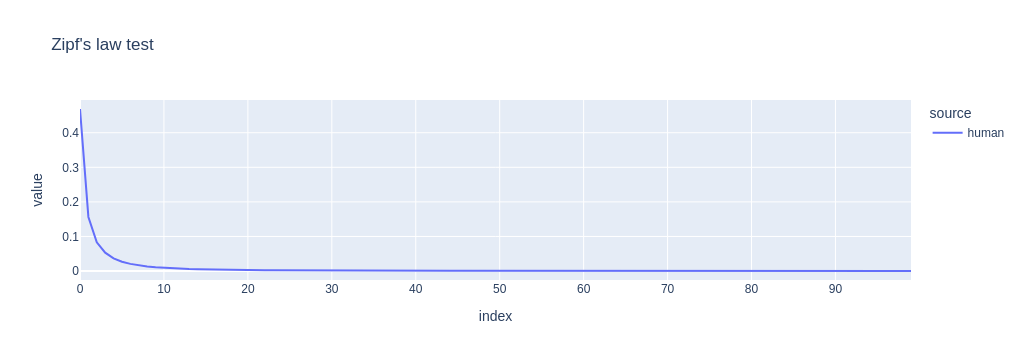

In [70]:
fig = px.line(all_distr[all_distr.source=='human'], title="Zipf's law test", color = 'source')
fig.show()

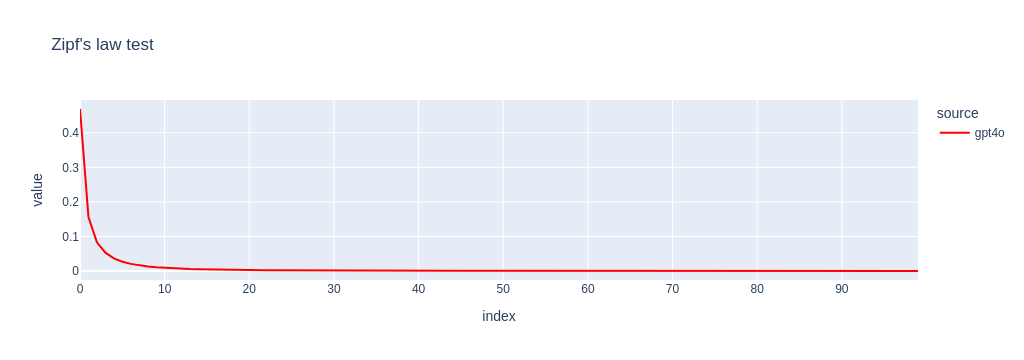

In [74]:
fig = px.line(all_distr[all_distr.source=='gpt4o'], title="Zipf's law test", color = 'source')
fig.update_traces(line_color='red')
fig.show()

In [84]:
# let's play with separate texts
# human text
human_text_stat = parallel_texts.iloc[42].human_counts[:100]
freq_to_range_ratio = [freq / (i + 1) for i, freq in enumerate(human_text_stat)]
norm_coef = sum(freq_to_range_ratio)
hum_normalized_distribution = pd.DataFrame([item / norm_coef for item in freq_to_range_ratio])
hum_normalized_distribution['source'] = 'human'

In [85]:
# gpt4 text
gpt4_text_stat = parallel_texts.iloc[42].gpt4o_counts[:100]
freq_to_range_ratio = [freq / (i + 1) for i, freq in enumerate(gpt4_text_stat)]
norm_coef = sum(freq_to_range_ratio)
gpt_normalized_distribution = pd.DataFrame([item / norm_coef for item in freq_to_range_ratio])
gpt_normalized_distribution['source'] = 'gpt4o'

In [86]:
# llama text
llama_text_stat = parallel_texts.iloc[42].llama3_70b_counts
freq_to_range_ratio = [freq / (i + 1) for i, freq in enumerate(llama_text_stat)]
norm_coef = sum(freq_to_range_ratio)
llama_normalized_distribution = pd.DataFrame([item / norm_coef for item in freq_to_range_ratio])
llama_normalized_distribution['source'] = 'llama3_70b_counts'

In [88]:
# claude text
claude_text_stat = parallel_texts.iloc[42].claude3_counts
freq_to_range_ratio = [freq / (i + 1) for i, freq in enumerate(claude_text_stat)]
norm_coef = sum(freq_to_range_ratio)
claude_normalized_distribution = pd.DataFrame([item / norm_coef for item in freq_to_range_ratio])
claude_normalized_distribution['source'] = 'claude3'

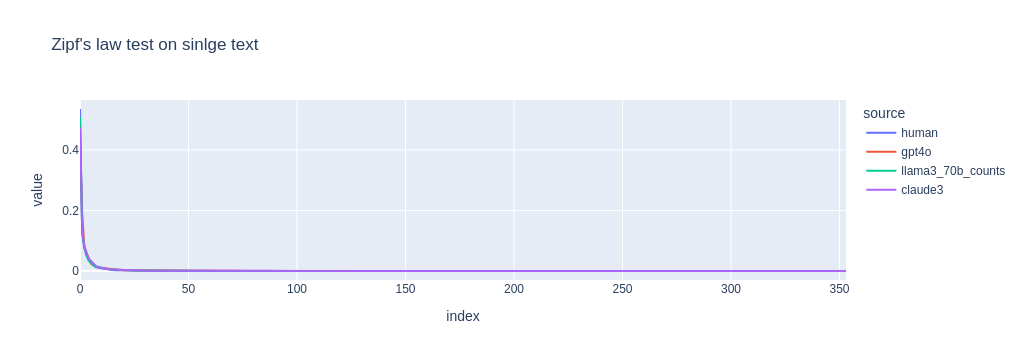

In [90]:
fig = px.line(pd.concat([hum_normalized_distribution, gpt_normalized_distribution, llama_normalized_distribution, claude_text_stat]), color='source', title="Zipf's law test on sinlge text")
fig.show()